In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
class Probs:
    
    def __init__(self, n):
        assert len(n)==2, "n must have two dimensions"
        
        probs = np.random.random(size=n)*n[0]
        probs = np.exp(probs)/np.sum(np.exp(probs))
        probs = pd.DataFrame(
                              probs, 
                              index   = [f"A{i:02d}" for i in range(n[0])],
                              columns = [f"B{i:02d}" for i in range(n[1])]
                            )       
        self.probs = probs
        
    def random_ab(self):
        return np.random.choice(self.probs.index), np.random.choice(self.probs.columns)
        
    def joint(self, a,b):
        return self.probs.loc[a][b]        
        
    def conditional_ab(self, a, b):
        return self.probs.loc[a][b] / self.probs[b].sum()

    def conditional_ba(self, b, a):
        return self.probs.loc[a][b] / self.probs.loc[a].sum()

    def marginal_a(self, a):
        return self.probs.loc[a].sum()

    def marginal_b(self, b):
        return self.probs[b].sum()

# check relation between joint and conditional


$$P(a,b) = P(a|b)P(b)$$

B00    0.167857
B01    0.346981
B02    0.407914
B03    0.077248
dtype: float64 
 A00    0.472284
A01    0.344986
A02    0.182730
dtype: float64 
 0.9999999999999999


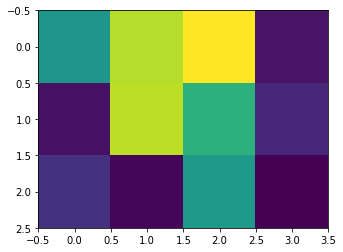

In [37]:
p = Probs((3,4))

print (p.probs.sum(), "\n", p.probs.T.sum(), "\n", p.probs.values.sum())
plt.imshow(p.probs.values)

# check joint is conditional times marginal

$$P(a,b) = P(a|b)P(b)$$

In [38]:
a, b = p.random_ab()
a, b

('A02', 'B02')

In [39]:
p.joint(a,b)

0.10510025439277366

In [40]:
p.conditional_ab(a,b) * p.marginal_b(b)

0.10510025439277365

# check bayes theorem

$$P(a|b) = \frac{P(b|a)P(a)}{P(b)} = \frac{P(a,b)}{P(b)}$$

In [41]:
a, b = p.random_ab()
a, b

('A00', 'B02')

In [42]:
p.conditional_ab(a, b)

0.4433230657335284

In [43]:
p.conditional_ba(b, a) * p.marginal_a(a) / p.marginal_b(b)

0.4433230657335284

In [44]:
p.joint(a,b) / p.marginal_b(b)

0.4433230657335284

# check normalization constant

$$P(b) = \sum_i P(b|a_i)p(a_i)$$

In [45]:
a, b = p.random_ab()
a, b

('A01', 'B01')

In [46]:
p.marginal_b(b)

0.3469810815792717

In [47]:
np.sum([p.conditional_ba(b,ai)*p.marginal_a(ai) for ai in p.probs.index])

0.3469810815792717